<a href="https://colab.research.google.com/github/Zach-Seymour/FDSFE_ZSeymour/blob/main/FDSfE_kmeans_24Oct23_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

<ipython-input-1-94c4aa801e77>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Get Kaggle dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

!chmod 600 /content/drive/MyDrive/Kaggle/kaggle.json

import json
envs = json.load(open("/content/drive/MyDrive/Kaggle/kaggle.json", "r"))

import os
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                  146KB  2023-10-05 06:45:37           9892        224  1.0              
nelgiriyewithana/top-spotify-songs-2023                     Most Streamed Spotify Songs 2023                   47KB  2023-08-26 11:04:57          39200       1125  1.0              
willianoliveiragibin/healthcare-insurance                   Healthcare Insurance                               16KB  2023-10-12 20:24:09            708         22  1.0              
nelgiriyewithana/billionaires-statistics-dataset            Billionaires Statistics Datase

In [5]:
!kaggle datasets download -d camnugent/california-housing-prices -p /content/drive/MyDrive/Kaggle

100% 400k/400k [00:00<00:00, 1.03MB/s]
100% 400k/400k [00:00<00:00, 1.02MB/s]


In [6]:
!unzip /content/drive/MyDrive/Kaggle/california-housing-prices.zip -d /content/drive/MyDrive/Kaggle

Archive:  /content/drive/MyDrive/Kaggle/california-housing-prices.zip
  inflating: /content/drive/MyDrive/Kaggle/housing.csv  


# Read dataset

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Kaggle/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Select subset of data and scale it

In [23]:
X = df.loc[:, ["median_income", "latitude", "longitude"]]
X

,median_income,latitude,longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [24]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100


In [25]:
scaler = StandardScaler()
scaler.fit(X)

X[X.columns] = scaler.transform(X)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
median_income,20640.0,6.609700e-17,1.000024,-1.774299,-0.688119,-0.176795,0.459306,5.858286
latitude,20640.0,-1.079584e-15,1.000024,-1.447568,-0.796789,-0.642287,0.972957,2.958068
longitude,20640.0,-8.526513e-15,1.000024,-2.385992,-1.113209,0.538914,0.778496,2.625280


# Cluster the data with kmeans

In [31]:
kmeans = KMeans(n_clusters=6, random_state=1415)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,median_income,latitude,longitude,Cluster
0,2.344766,1.052548,-1.327835,4
1,2.332238,1.043185,-1.322844,4
2,1.782699,1.038503,-1.332827,4
3,0.932968,1.038503,-1.337818,4
4,-0.012881,1.038503,-1.337818,1
...,...,...,...,...
20635,-1.216128,1.801647,-0.758826,1
20636,-0.691593,1.806329,-0.818722,1
20637,-1.142593,1.778237,-0.823713,1
20638,-1.054583,1.778237,-0.873626,1


# Visualize the clusters locations

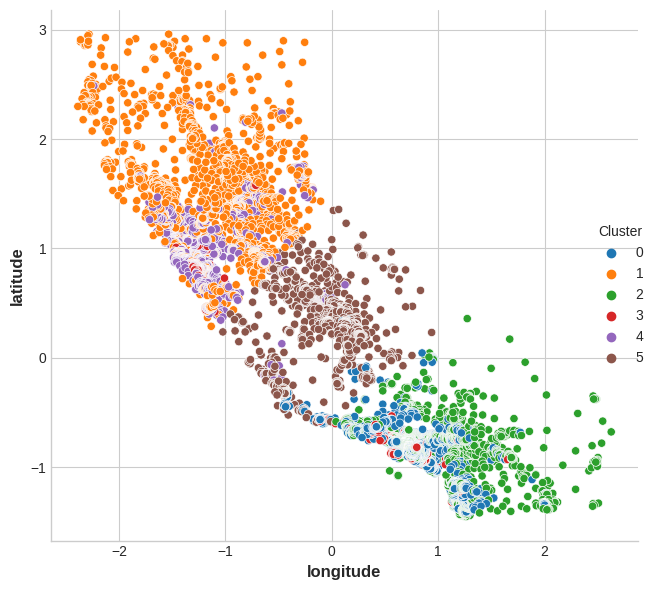

In [33]:
sns.relplot(
    x="longitude", y="latitude", hue="Cluster", data=X, height=6,
)

# Visualize the cluster values

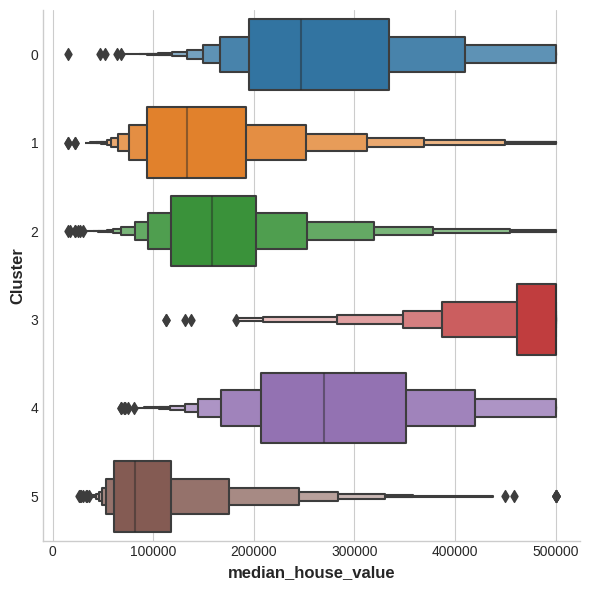

In [34]:
X["median_house_value"] = df["median_house_value"]
sns.catplot(x="median_house_value", y="Cluster", data=X, kind="boxen", height=6);